In [1]:
# Importing the necessary modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2 # open-cv used for image processing 
%matplotlib inline

In [2]:
#  Importing CNN-related modules
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dropout,Conv2D,MaxPooling2D,Flatten,Dense,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.metrics import classification_report,accuracy_score
import time
import cv2
import os
import numpy as np


In [5]:
# Directory assignment
train_dir = 'Emergency_Vehicles/train'
test_dir = 'Emergency_Vehicles/test'

In [6]:
# Reading an image
image = cv2.imread(train_dir+'/10.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB) # converting to RGB


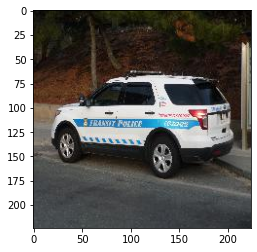

In [7]:
# Showing the image
plt.imshow(image)

In [17]:
# Viewing the shape of the image
image.shape

(224, 224, 3)

In [9]:
# Image Pre-processing
from keras.preprocessing.image import ImageDataGenerator # Keras image data generator is used for the generatio

In [10]:
# Image Transformation and Augmentation
# Here we are applying our desired transformations 
image_gen = ImageDataGenerator(
 rotation_range=20,# specifies the rotation to be 20%
 width_shift_range=0.1, # specifies the width shift of 10%
 height_shift_range=0.1,# specifies the height shift of 10%
 shear_range=0.20, # crops part of the image 
 zoom_range=0.20, # #zooms the image by 20%
 fill_mode='nearest', # fills using the nearest pixel 
 horizontal_flip=True, # Secifies the horizontal flip 
 rescale=1/255 # scales the image 
)


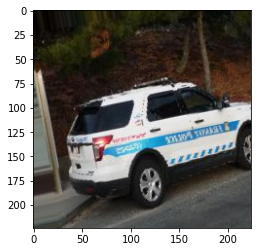

In [11]:
# showing the transformation
plt.imshow(image_gen.random_transform(image))


In [12]:
# Reading the labels
train_df=pd.read_csv(r'Emergency_Vehicles/train.csv')
test_df=pd.read_csv(r'Emergency_Vehicles/test.csv')


In [13]:
# View the training labels
train_df

,image_names,emergency_or_not
0,1503.jpg,0
1,1420.jpg,0
2,1764.jpg,0
3,1356.jpg,0
4,1117.jpg,0
...,...,...
1641,1638.jpg,0
1642,1095.jpg,0
1643,1130.jpg,0
1644,1294.jpg,0


In [14]:
# Convert the series into string object
train_df['emergency_or_not']=train_df['emergency_or_not'].astype(str)

In [15]:
# View the dataset information
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1646 entries, 0 to 1645
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   image_names       1646 non-null   object
 1   emergency_or_not  1646 non-null   object
dtypes: object(2)
memory usage: 25.8+ KB


In [18]:
# Image pre-processing to prepare them for training for better performance
train_generator=image_gen.flow_from_dataframe(dataframe=train_df[:1150], # specify the dataset used for trainin
 directory=train_dir, # specify the path to the directory
 x_col='image_names', # specify the names of the images
 y_col='emergency_or_not', # specifies the class labels
 class_mode='binary', # specifies the kind of classification
 target_size=(224,224), # specifies the dimension to resize the im
 batch_size=50# defines the batch size 
 )
validation_generator=image_gen.flow_from_dataframe(dataframe=train_df[1150:], # specify the dataset used for tr
 directory=train_dir, # specify the path to the directory
 x_col='image_names', # specify the names of the images
 y_col='emergency_or_not', # specifies the class labels
 class_mode='binary', # specifies the kind of classification
 target_size=(224,224), # specifies the dimension to resize the im
 batch_size=50 # defines the batch size 
 ) 


Found 1150 validated image filenames belonging to 2 classes.
Found 496 validated image filenames belonging to 2 classes.


In [34]:
# Duplicating the data into the four different datasets for training each of the four models
train_generator1 = train_generator
validation_generator1 = validation_generator
train_generator2 = train_generator
validation_generator2 = validation_generator
train_generator3 = train_generator
validation_generator3 = validation_generator
train_generator4 = train_generator
validation_generator4 = validation_generator

# Defining model Type 1

In [35]:
# Creating the first model
model = Sequential()
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(224,224,3),activation = 'relu',padding = 'same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(50,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation = 'sigmoid'))

In [36]:
#  Image Compilation
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = 'accuracy')

In [37]:
# Model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 802816)            0         
                                                                 
 dense_2 (Dense)             (None, 50)                40140850  
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                      

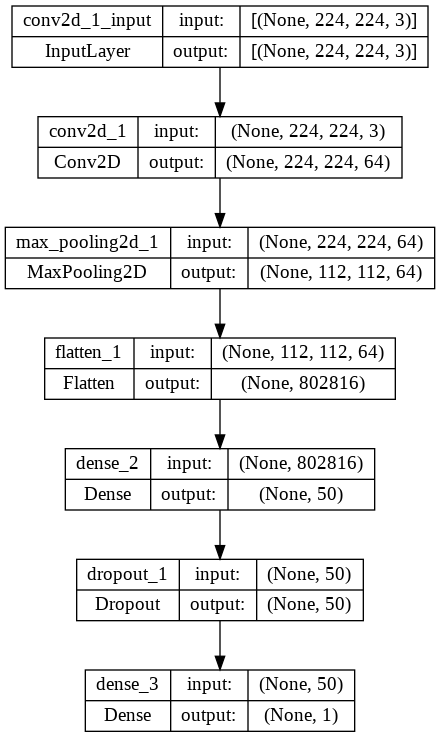

In [38]:
# Plotting the model
tf.keras.utils.plot_model(model, show_shapes=True)

In [39]:
# Training Stage
start = time.time()
history=model.fit(train_generator1,epochs = 10,validation_data = validation_generator1)

Epoch 1/10
23/23 [==============================] - 22s 926ms/step - loss: 7.6332 - accuracy: 0.5530 - val_loss: 0.9702 - val_accuracy: 0.4415
Epoch 2/10
23/23 [==============================] - 18s 809ms/step - loss: 0.6737 - accuracy: 0.6478 - val_loss: 0.5613 - val_accuracy: 0.7278
Epoch 3/10
23/23 [==============================] - 18s 803ms/step - loss: 0.6013 - accuracy: 0.7017 - val_loss: 0.5339 - val_accuracy: 0.7661
Epoch 4/10
23/23 [==============================] - 20s 871ms/step - loss: 0.5727 - accuracy: 0.7261 - val_loss: 0.5120 - val_accuracy: 0.7681
Epoch 5/10
23/23 [==============================] - 18s 802ms/step - loss: 0.5457 - accuracy: 0.7383 - val_loss: 0.4914 - val_accuracy: 0.7681
Epoch 6/10
23/23 [==============================] - 18s 803ms/step - loss: 0.5172 - accuracy: 0.7461 - val_loss: 0.4650 - val_accuracy: 0.8065
Epoch 7/10
23/23 [==============================] - 18s 800ms/step - loss: 0.4901 - accuracy: 0.7774 - val_loss: 0.4396 - val_accuracy: 0.8085

In [40]:
# Time taken for training the model
print("Total time: ", (time.time() - start)/60, "minutes")

Total time:  3.219629184405009 minutes


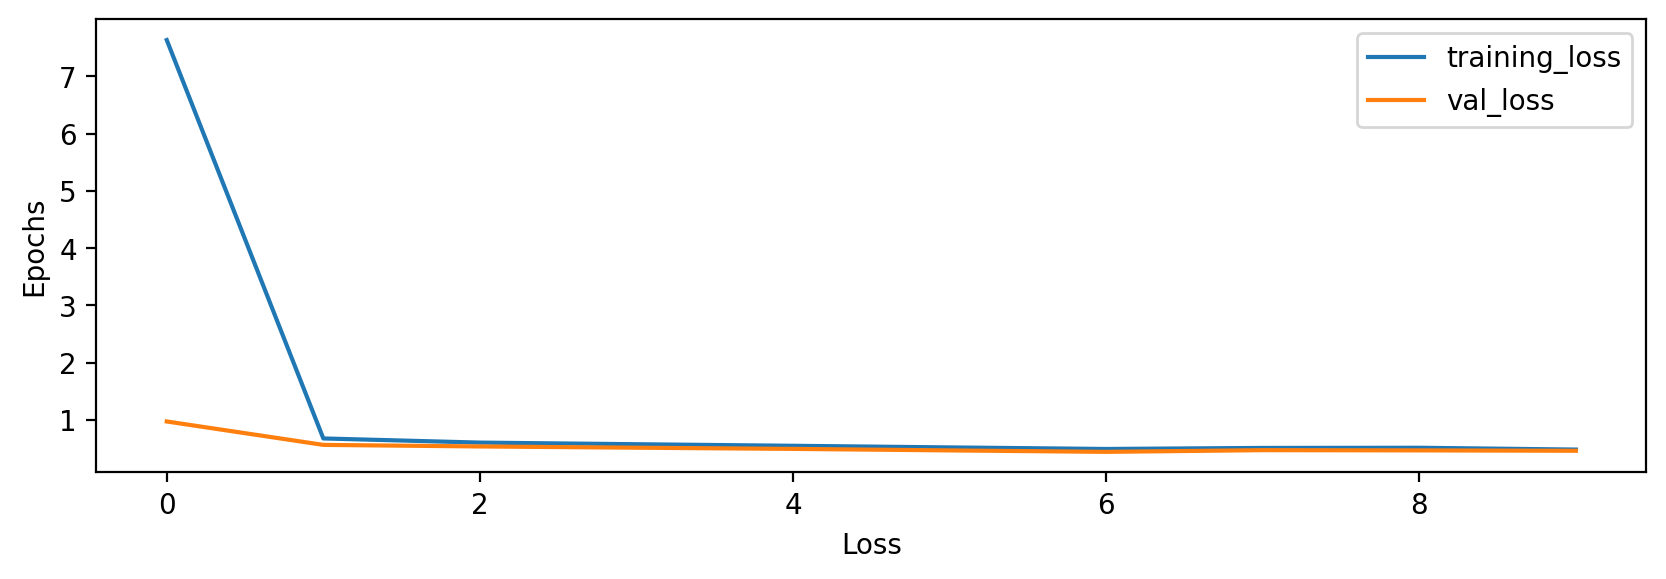

In [41]:
# checking for overfitting 
history_df = pd.DataFrame(history.history)
plt.figure(dpi=200, figsize = (10,3))
plt.plot(history_df['loss'],
 label='training_loss')
plt.plot(history_df['val_loss'],
 label='val_loss')
plt.xlabel('Loss')
plt.ylabel('Epochs')
plt.legend()
plt.show()


In [42]:
# Evaluation stage
test_generator=image_gen.flow_from_dataframe(dataframe=test_df, # specify the dataset used for training
 directory=test_dir, # specify the path to the directory
 x_col='image_names', # specify the names of the images
 class_mode=None, # specifies the kind of classification
 target_size=(224,224), # specifies the dimension to resize the im
 batch_size=12 # defines the batch size 
 )

Found 706 validated image filenames.


In [43]:
# Model Evaluation of the Test data
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)

predictions = model.predict(test_generator, steps=test_steps_per_epoch)


59/59 [==============================] - 8s 133ms/step


In [44]:
#  Reshape to 1-dimensional array
prediction = predictions.reshape(706,)

In [45]:
# converting probabilities to classes
prediction_int = (prediction >= 0.5).astype("int32")

In [46]:
# Extract the target values
y_test = test_df["emergency_or_not"]

In [47]:
# Creating the class labels
class_labels = ["not_emergency", "emergency"]

In [48]:
# Evaluation reports
from sklearn.metrics import classification_report, accuracy_score
report = classification_report(y_test, prediction_int, target_names=class_labels)
print(report)
accuracy_score(y_test, prediction_int)

               precision    recall  f1-score   support

not_emergency       0.60      0.61      0.60       395
    emergency       0.49      0.48      0.49       311

     accuracy                           0.55       706
    macro avg       0.55      0.54      0.55       706
 weighted avg       0.55      0.55      0.55       706



0.5524079320113314

# Defining Model 2

In [49]:
# Creating the second model
model2 = Sequential()
model2.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(224,224,3),activation = 'relu',padding = 'same'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Conv2D(filters=64,kernel_size=(3,3), activation = 'relu',padding = 'same'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Flatten())
model2.add(Dense(50,activation = 'relu'))
model2.add(Dropout(0.2))
model2.add(Dense(1,activation = 'sigmoid'))

In [50]:
#  Image Compilation
model2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = 'accuracy')

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 200704)            0         
                                                                 
 dense_4 (Dense)             (None, 50)               

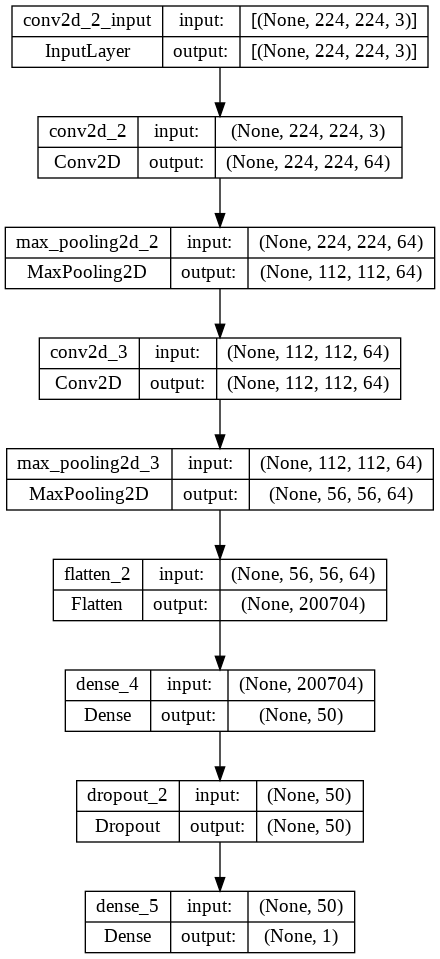

In [51]:
# Model plotting
tf.keras.utils.plot_model(model2, show_shapes=True)

In [52]:
# Training Stage
start = time.time()
history2=model2.fit(train_generator2,epochs = 10,validation_data = validation_generator2)


Epoch 1/10
23/23 [==============================] - 20s 844ms/step - loss: 1.1318 - accuracy: 0.5965 - val_loss: 0.6073 - val_accuracy: 0.7117
Epoch 2/10
23/23 [==============================] - 19s 821ms/step - loss: 0.6185 - accuracy: 0.6696 - val_loss: 0.5603 - val_accuracy: 0.7661
Epoch 3/10
23/23 [==============================] - 19s 812ms/step - loss: 0.5752 - accuracy: 0.6991 - val_loss: 0.5179 - val_accuracy: 0.7742
Epoch 4/10
23/23 [==============================] - 19s 812ms/step - loss: 0.5688 - accuracy: 0.7139 - val_loss: 0.4958 - val_accuracy: 0.7681
Epoch 5/10
23/23 [==============================] - 19s 819ms/step - loss: 0.5660 - accuracy: 0.7339 - val_loss: 0.4997 - val_accuracy: 0.7843
Epoch 6/10
23/23 [==============================] - 19s 814ms/step - loss: 0.5299 - accuracy: 0.7330 - val_loss: 0.4923 - val_accuracy: 0.7863
Epoch 7/10
23/23 [==============================] - 19s 814ms/step - loss: 0.5311 - accuracy: 0.7635 - val_loss: 0.4618 - val_accuracy: 0.8024

In [53]:
# Time taken to train the model
print("Total time: ", (time.time() - start)/60, "minutes")

Total time:  3.1700897932052614 minutes


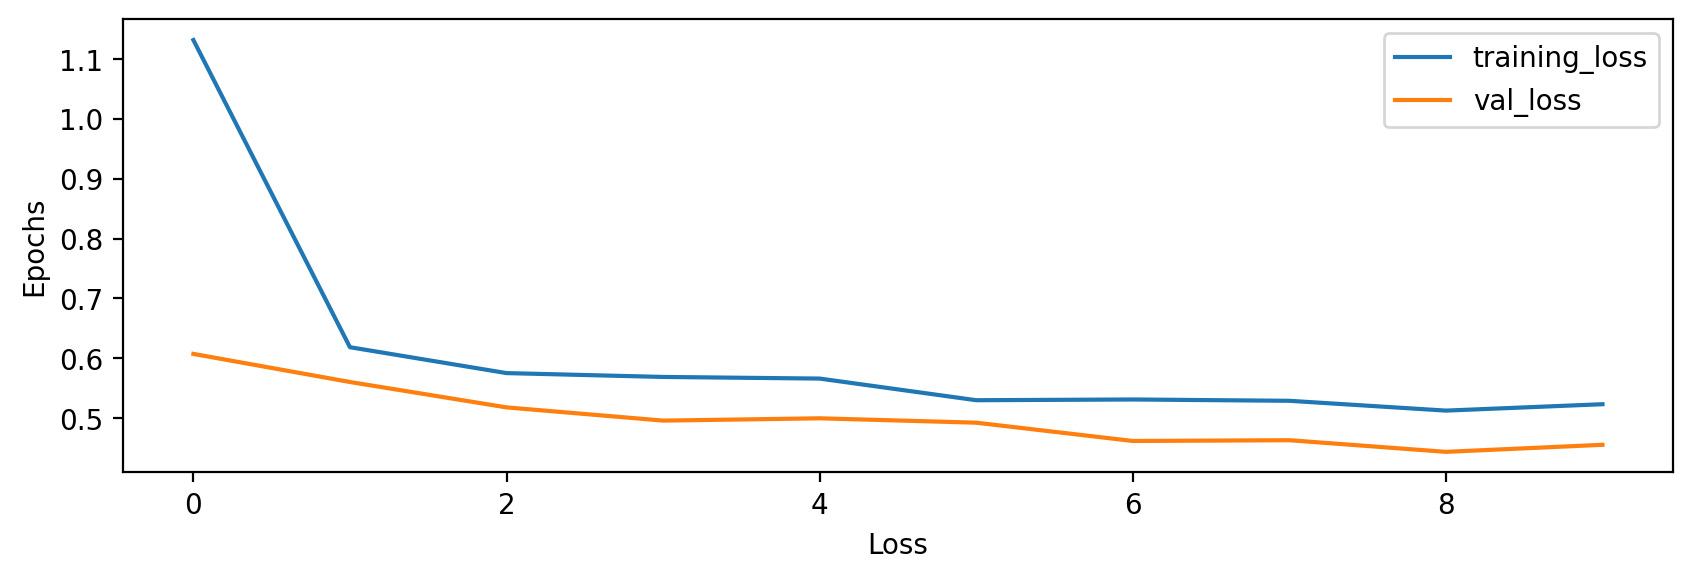

In [54]:
# checking for overfitting 
history_df2 = pd.DataFrame(history2.history)
plt.figure(dpi=200, figsize = (10,3))
plt.plot(history_df2['loss'],
 label='training_loss')
plt.plot(history_df2['val_loss'],
 label='val_loss')
plt.xlabel('Loss')
plt.ylabel('Epochs')
plt.legend()
plt.show()


In [55]:
# Evaluation stage
test_generator=image_gen.flow_from_dataframe(dataframe=test_df, # specify the dataset used for training
 directory=test_dir, # specify the path to the directory
 x_col='image_names', # specify the names of the images
 class_mode=None, # specifies the kind of classification
 target_size=(224,224), # specifies the dimension to resize the im
 batch_size=12 # defines the batch size 
 )

Found 706 validated image filenames.


In [56]:
# Model Evaluation of the Test data
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)

predictions = model2.predict(test_generator, steps=test_steps_per_epoch)

#  Reshape to 1-dimensional array
prediction = predictions.reshape(706,)
# converting probabilities to classes
prediction_int = (prediction >= 0.5).astype("int32")
# Extract the target values
y_test = test_df["emergency_or_not"]
# Defining class labels
class_labels = ["not_emergency", "emergency"]



59/59 [==============================] - 8s 135ms/step


In [57]:
# Evaluation reports
from sklearn.metrics import classification_report, accuracy_score
report = classification_report(y_test, prediction_int, target_names=class_labels)
print(report)

accuracy_score(y_test, prediction_int)


               precision    recall  f1-score   support

not_emergency       0.55      0.69      0.61       395
    emergency       0.42      0.29      0.34       311

     accuracy                           0.51       706
    macro avg       0.49      0.49      0.48       706
 weighted avg       0.49      0.51      0.49       706



0.5113314447592068

# Definition of Model 3 

In [58]:
# Creating the third model
model3 = Sequential()
model3.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(224,224,3),activation = 'relu',padding = 'same'))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Conv2D(filters=64,kernel_size=(3,3), activation = 'relu',padding = 'same'))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Conv2D(filters=64,kernel_size=(3,3), activation = 'relu',padding = 'same'))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Flatten())
model3.add(Dense(50,activation = 'relu'))
model3.add(Dropout(0.2))
model3.add(Dense(1,activation = 'sigmoid'))

In [59]:
#  Image Compilation
model3.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = 'accuracy')

model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 56, 56, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 28, 28, 64)      

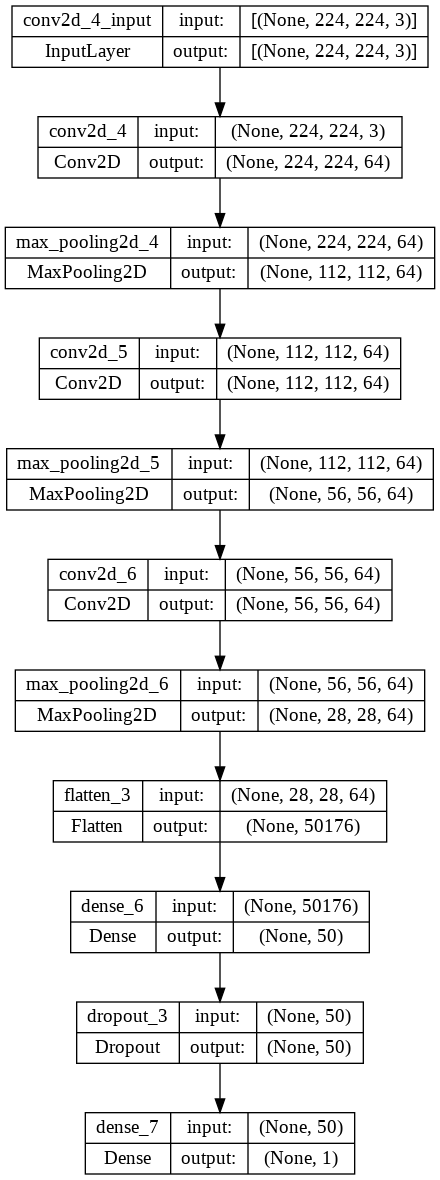

In [60]:
# Plotting the third model
tf.keras.utils.plot_model(model3, show_shapes=True)

In [61]:
# Training Stage
start = time.time()
history3=model3.fit(train_generator3,epochs = 10,validation_data = validation_generator3)

Epoch 1/10
23/23 [==============================] - 21s 910ms/step - loss: 0.7075 - accuracy: 0.5800 - val_loss: 0.6129 - val_accuracy: 0.7339
Epoch 2/10
23/23 [==============================] - 19s 821ms/step - loss: 0.6129 - accuracy: 0.6704 - val_loss: 0.5156 - val_accuracy: 0.7661
Epoch 3/10
23/23 [==============================] - 19s 825ms/step - loss: 0.5913 - accuracy: 0.7130 - val_loss: 0.5473 - val_accuracy: 0.7278
Epoch 4/10
23/23 [==============================] - 19s 814ms/step - loss: 0.5510 - accuracy: 0.7365 - val_loss: 0.5230 - val_accuracy: 0.7540
Epoch 5/10
23/23 [==============================] - 19s 812ms/step - loss: 0.5321 - accuracy: 0.7409 - val_loss: 0.4505 - val_accuracy: 0.8044
Epoch 6/10
23/23 [==============================] - 19s 811ms/step - loss: 0.4989 - accuracy: 0.7722 - val_loss: 0.4740 - val_accuracy: 0.7823
Epoch 7/10
23/23 [==============================] - 19s 818ms/step - loss: 0.4847 - accuracy: 0.7826 - val_loss: 0.4739 - val_accuracy: 0.7722

In [62]:
# Time taken to train the model
print("Total time: ", (time.time() - start)/60, "minutes")

Total time:  3.2258527080217996 minutes


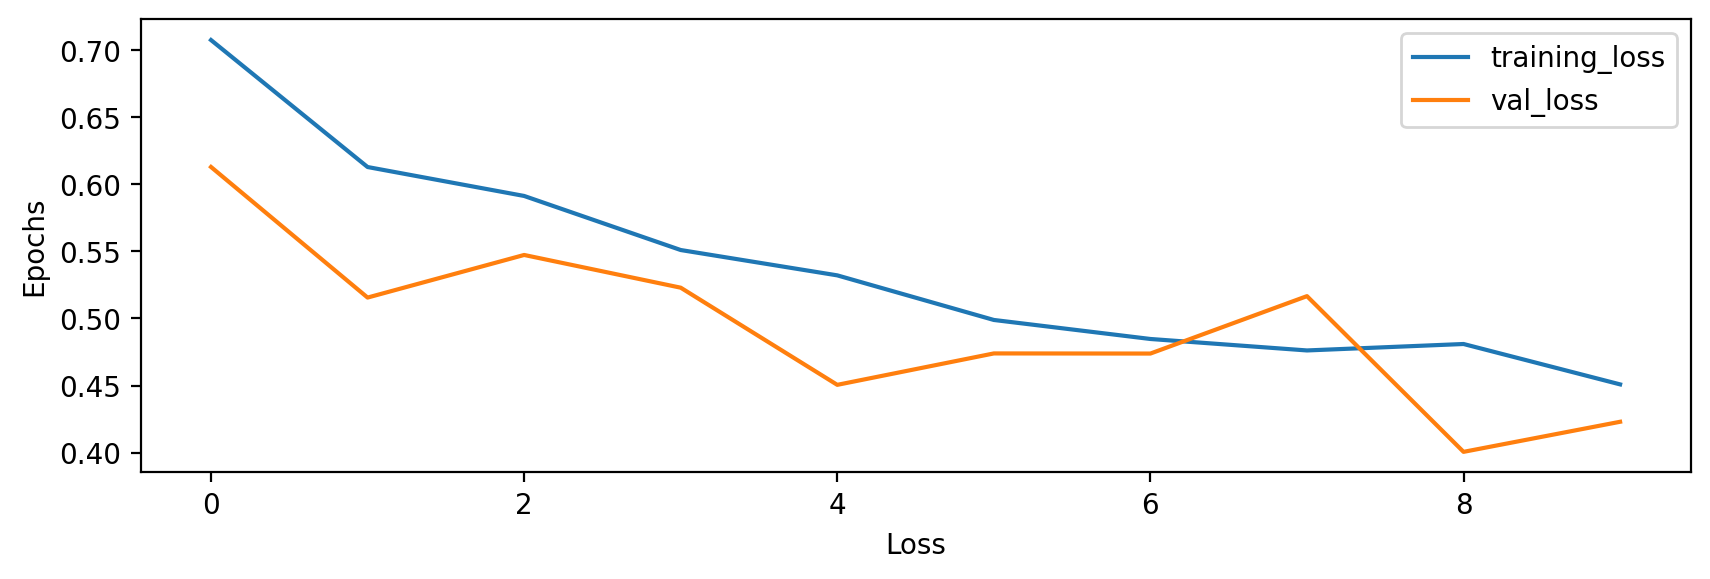

In [63]:
# checking for overfitting 
history_df3 = pd.DataFrame(history3.history)
plt.figure(dpi=200, figsize = (10,3))
plt.plot(history_df3['loss'],
 label='training_loss')
plt.plot(history_df3['val_loss'],
 label='val_loss')
plt.xlabel('Loss')
plt.ylabel('Epochs')
plt.legend()
plt.show()


In [64]:
# Evaluation stage
test_generator=image_gen.flow_from_dataframe(dataframe=test_df, # specify the dataset used for training
 directory=test_dir, # specify the path to the directory
 x_col='image_names', # specify the names of the images
 class_mode=None, # specifies the kind of classification
 target_size=(224,224), # specifies the dimension to resize the im
 batch_size=12 # defines the batch size 
 )

Found 706 validated image filenames.


In [65]:
# Model Evaluation of the Test data
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)

predictions = model3.predict(test_generator, steps=test_steps_per_epoch)

#  Reshape to 1-dimensional array
prediction = predictions.reshape(706,)
# converting probabilities to classes
prediction_int = (prediction >= 0.5).astype("int32")
# Extract the target values
y_test = test_df["emergency_or_not"]
# Defining class labels
class_labels = ["not_emergency", "emergency"]

59/59 [==============================] - 9s 144ms/step


In [66]:
# Evaluation reports
from sklearn.metrics import classification_report, accuracy_score
report = classification_report(y_test, prediction_int, target_names=class_labels)
print(report)

accuracy_score(y_test, prediction_int)

               precision    recall  f1-score   support

not_emergency       0.55      0.69      0.61       395
    emergency       0.41      0.27      0.33       311

     accuracy                           0.50       706
    macro avg       0.48      0.48      0.47       706
 weighted avg       0.48      0.50      0.48       706



0.5042492917847026

# Definition of Model 4

In [67]:
# Creating the fourth model
model4 = Sequential()
model4.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(224,224,3),activation = 'relu',padding = 'same'))
model4.add(MaxPooling2D(pool_size=(2,2)))
model4.add(Conv2D(filters=64,kernel_size=(3,3), activation = 'relu',padding = 'same'))
model4.add(MaxPooling2D(pool_size=(2,2)))
model4.add(Conv2D(filters=64,kernel_size=(3,3), activation = 'relu',padding = 'same'))
model4.add(MaxPooling2D(pool_size=(2,2)))
model4.add(Conv2D(filters=64,kernel_size=(3,3), activation = 'relu',padding = 'same'))
model4.add(MaxPooling2D(pool_size=(2,2)))
model4.add(Flatten())
model4.add(Dense(50,activation = 'relu'))
model4.add(Dropout(0.2))
model4.add(Dense(1,activation = 'sigmoid'))

In [68]:
#  Image Compilation
model4.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = 'accuracy')

model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 56, 56, 64)        36928     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 28, 28, 64)      

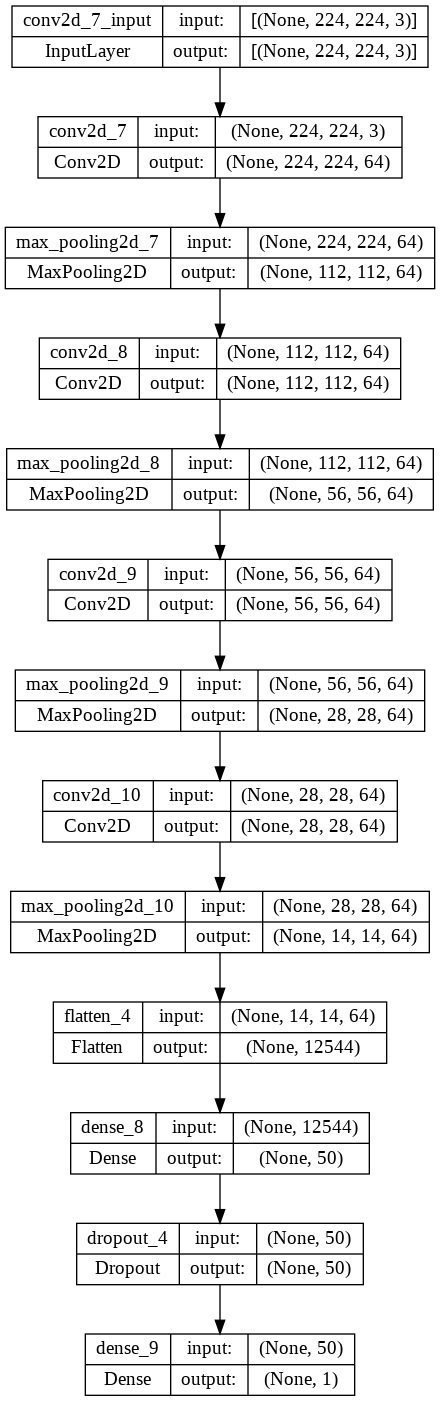

In [69]:
tf.keras.utils.plot_model(model4, show_shapes=True)

In [70]:
# Training Stage
start = time.time()
history4=model4.fit(train_generator4,epochs = 10,validation_data = validation_generator4)

Epoch 1/10
23/23 [==============================] - 20s 850ms/step - loss: 0.7063 - accuracy: 0.5661 - val_loss: 0.6734 - val_accuracy: 0.6069
Epoch 2/10
23/23 [==============================] - 19s 820ms/step - loss: 0.6600 - accuracy: 0.6261 - val_loss: 0.6708 - val_accuracy: 0.5504
Epoch 3/10
23/23 [==============================] - 19s 813ms/step - loss: 0.6464 - accuracy: 0.6478 - val_loss: 0.6061 - val_accuracy: 0.7077
Epoch 4/10
23/23 [==============================] - 18s 806ms/step - loss: 0.6103 - accuracy: 0.7243 - val_loss: 0.5118 - val_accuracy: 0.7742
Epoch 5/10
23/23 [==============================] - 20s 876ms/step - loss: 0.5662 - accuracy: 0.7322 - val_loss: 0.4607 - val_accuracy: 0.7883
Epoch 6/10
23/23 [==============================] - 19s 812ms/step - loss: 0.5280 - accuracy: 0.7565 - val_loss: 0.4642 - val_accuracy: 0.7641
Epoch 7/10
23/23 [==============================] - 18s 807ms/step - loss: 0.5099 - accuracy: 0.7478 - val_loss: 0.5052 - val_accuracy: 0.7641

In [71]:
print("Total time: ", (time.time() - start)/60, "minutes")

Total time:  3.147582193215688 minutes


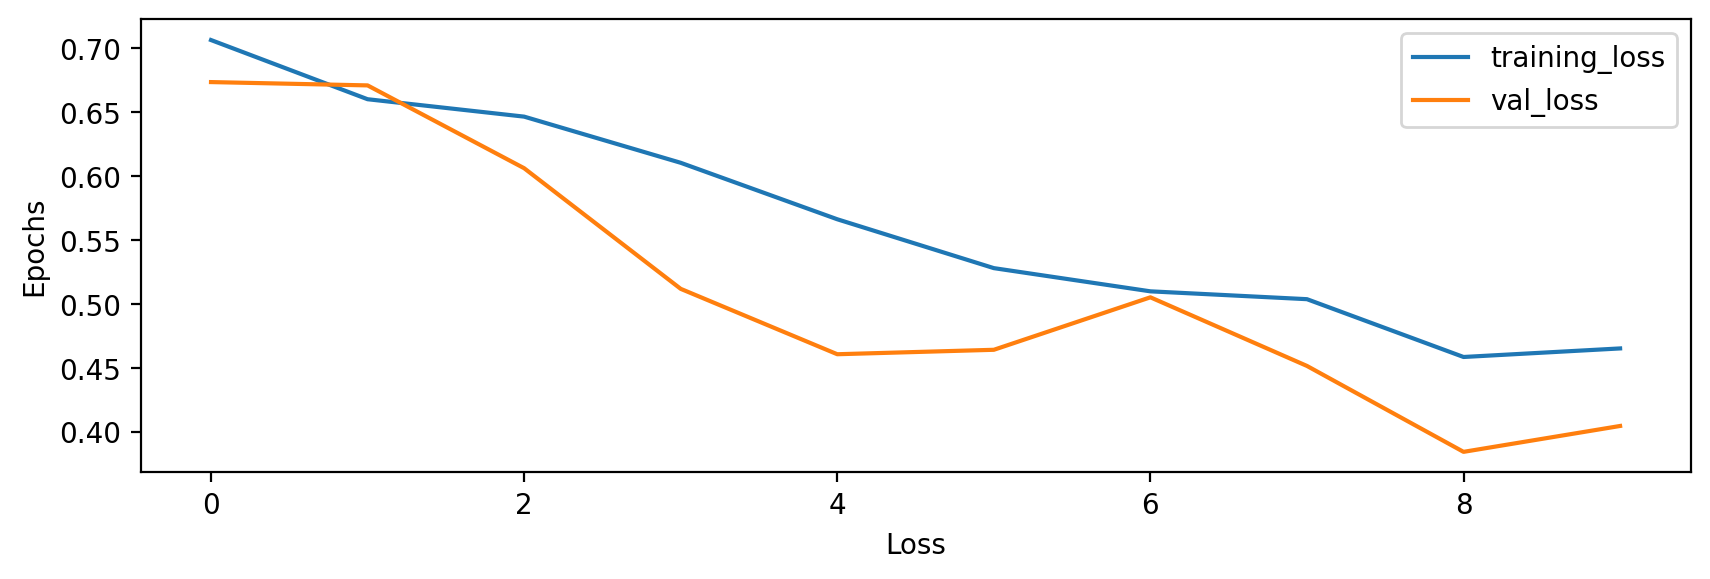

In [72]:
# checking for overfitting 
history_df4 = pd.DataFrame(history4.history)
plt.figure(dpi=200, figsize = (10,3))
plt.plot(history_df4['loss'],
 label='training_loss')
plt.plot(history_df4['val_loss'],
 label='val_loss')
plt.xlabel('Loss')
plt.ylabel('Epochs')
plt.legend()
plt.show()

In [73]:
# Evaluation stage
test_generator=image_gen.flow_from_dataframe(dataframe=test_df, # specify the dataset used for training
 directory=test_dir, # specify the path to the directory
 x_col='image_names', # specify the names of the images
 class_mode=None, # specifies the kind of classification
 target_size=(224,224), # specifies the dimension to resize the im
 batch_size=12 # defines the batch size 
 )

Found 706 validated image filenames.


In [74]:

# Model Evaluation of the Test data
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)

predictions = model4.predict(test_generator, steps=test_steps_per_epoch)

#  Reshape to 1-dimensional array
prediction = predictions.reshape(706,)
# converting probabilities to classes
prediction_int = (prediction >= 0.5).astype("int32")
# Extract the target values
y_test = test_df["emergency_or_not"]
# Defining class labels
class_labels = ["not_emergency", "emergency"]



59/59 [==============================] - 8s 132ms/step


In [76]:
from sklearn.metrics import classification_report, accuracy_score
report = classification_report(y_test, prediction_int, target_names=class_labels)
print(report)
accuracy_score(y_test, prediction_int)

               precision    recall  f1-score   support

not_emergency       0.54      0.51      0.52       395
    emergency       0.42      0.44      0.43       311

     accuracy                           0.48       706
    macro avg       0.48      0.48      0.48       706
 weighted avg       0.49      0.48      0.48       706



0.48158640226628896